# LoRA Easy Training Colab
[![Ko-Fi](https://img.shields.io/badge/Ko--fi-F16061?logo=ko-fi&logoColor=white&style=flat)](https://ko-fi.com/jelosus1)

### Colab powered by [Lora_Easy_Training_Scripts_Backend](https://github.com/derrian-distro/LoRA_Easy_Training_scripts_Backend/)


---


Learn how to use the colab [here](https://civitai.com/articles/4409).

If you feel something is missing, want something to be added or simply found a bug, open an [issue](https://github.com/Jelosus2/Lora_Easy_Training_Colab/issues).

---

Last Update: February 3, 2025. Check the [full changelog](https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#changelog)

Changes:
- Fixed slow tagging.
- Fixed path issues when setting up directories.

In [10]:
# @title ## 1. Install the trainer ![doro](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro.png)
import os
from pathlib import Path

root_path = Path("/content")
trainer_dir = root_path.joinpath("trainer")

venv_pip = trainer_dir.joinpath("sd_scripts/venv/bin/pip")
venv_python = trainer_dir.joinpath("sd_scripts/venv/bin/python")

# @markdown Execute the cell to install the trainer

installed_dependencies = False
first_step_done = False

def install_trainer():
  global installed_dependencies, first_step_done

  print("Installing trainer...")
  !apt -y update -qq
  !apt install -y python3.10-venv aria2 -qq

  installed_dependencies = True

  !git clone https://github.com/derrian-distro/LoRA_Easy_Training_scripts_Backend {trainer_dir}

  !chmod 755 /content/trainer/colab_install.sh
  os.chdir(trainer_dir)
  !./colab_install.sh

  os.chdir(root_path)

  first_step_done = True
  print("Installation complete!")

def download_custom_wd_tagger():
  global wd_path

  wd_path = trainer_dir.joinpath("sd_scripts/finetune/tag_images_by_wd14_tagger.py")

  print("Downloading tagger script that allows v3 taggers...")
  !rm "{wd_path}"
  !aria2c "https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/main/custom/tag_images_by_wd14_tagger.py" --console-log-level=warn -c -s 16 -x 16 -k 10M -d / -o "{wd_path}"

def fix_scripts_logging():
  print("Fixing sd_scripts logging issue on colab...")
  !yes | {venv_pip} uninstall rich

def main():
  install_trainer()
  download_custom_wd_tagger()
  fix_scripts_logging()
  print("Finished installation!")

try:
  main()
except Exception as e:
  print(f"Error intalling the trainer!\n{e}")
  first_step_done = False

Installing trainer...
39 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
aria2 is already the newest version (1.36.0-1).
The following additional packages will be installed:
  python3-pip-whl python3-setuptools-whl
The following NEW packages will be installed:
  python3-pip-whl python3-setuptools-whl python3.10-venv
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,474 kB of archives.
After this operation, 2,885 kB of additional disk space will be used.
Selecting previously unselected package python3-pip-whl.
(Reading database ... 126175 files and directories currently installed.)
Preparing to unpack .../python3-pip-whl_22.0.2+dfsg-1ubuntu0.5_all.deb ...
Unpacking python3-pip-whl (22.0.2+dfsg-1ubuntu0.5) ...
Selecting previously unselected package python

In [11]:
# @title ## 2. Setup the directories ![doro diamond](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_diamond.png)
from pathlib import Path
from google.colab import drive

if not globals().get("first_step_done"):
  root_path = Path("/content")
  trainer_dir = root_path.joinpath("trainer")

drive_dir = root_path.joinpath("drive/MyDrive")
pretrained_model_dir = root_path.joinpath("pretrained_model")
vae_dir = root_path.joinpath("vae")
tagger_models_dir = root_path.joinpath("tagger_models")

# @markdown The base path for your project. Make sure it can be used as a folder name
project_path = "Loras/My_first_lora" # @param {type: "string"}
# @markdown Specify the name for the directories. If you have multiple datasets, separate each with a comma `(,)` like this: **dataset1, dataset2, ...**

# @markdown The directory where the results of the training will be stored.
output_dir_name = "output" # @param {type: "string"}
# @markdown The directory where your dataset(s) will be located.
dataset_dir_name = "dataset" # @param {type: "string"}
# @markdown Use Drive to store all the files and directories
use_drive = True # @param {type: "boolean"}

project_path = project_path.replace(" ", "_")
output_dir_name = output_dir_name.replace(" ", "_")

second_step_done = False

def is_valid_folder_name(folder_name: str) -> bool:
  invalid_characters = '<>:"/\|?*'

  if any(char in invalid_characters for char in folder_name):
    return False

  return True

def mount_drive_dir() -> Path:
  base_dir = root_path.joinpath(project_path)

  if use_drive:
    if not Path(drive_dir).exists():
      drive.mount(Path(drive_dir).parent.as_posix())
    base_dir = drive_dir.joinpath(project_path)

  return base_dir

def make_directories():
  mount_drive = mount_drive_dir()
  output_dir = mount_drive.joinpath(output_dir_name)

  if not Path(mount_drive).exists():
    Path(mount_drive).mkdir(parents=True, exist_ok=True)

  for dir in [pretrained_model_dir, vae_dir, output_dir, tagger_models_dir]:
    Path(dir).mkdir(parents=True, exist_ok=True)

  for dataset_m_dir in dataset_dir_name.replace(" ", "").split(','):
    if is_valid_folder_name(dataset_m_dir):
      Path(mount_drive.joinpath(dataset_m_dir)).mkdir(parents=True, exist_ok=True)
    else:
      print(f"{dataset_m_dir} is not a valid name for a folder")
      return

def main():
  for name in [project_path, output_dir_name]:
      if not is_valid_folder_name(name.replace("/", "") if project_path == name else name):
        print(f"{name} is not a valid name for a folder")
        return

  print("Setting up directories...")
  make_directories()
  print("Done!")

try:
  main()
  second_step_done = True
except Exception as e:
  print(f"Error setting up the directories!\n{e}")
  second_step_done = False

Setting up directories...
Done!


In [12]:
# @title ## 3. Download the base model and/or VAE used for training ![doro fubuki](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_fubuki.png)
import re
from pathlib import Path

model_url = ""
vae_url = ""

# @markdown Default models are provided here for training. If you want to use another one, introduce the URL in the input below. The link must be pointing to either Civitai or Hugging Face and have the correct format. You can check how to get the correct link [here](https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#how-to-get-the-link-for-custom-modelvae).
training_model = "(XL) NoobAI Epsilon v1.0" # @param ["(XL) PonyDiffusion v6", "(XL) NoobAI Epsilon v1.0", "(XL) Illustrious v0.1", "(XL) Animagine 3.1", "(XL) SDXL 1.0", "(1.5) anime-full-final-pruned (Most used on Anime LoRAs)", "(1.5) AnyLora", "(1.5) SD 1.5"]
custom_training_model = "" # @param {type: "string"}
# @markdown The name you want to give to the downloaded model file, if not specified default ones will be used.
model_name = "" # @param {type: "string"}
# @markdown VAE used for training. It's not needed for 1.5 nor XL, but it's recommended to use the SDXL base VAE for XL training. If you want to use a custom one, introduce the URL in the input below.
vae = "SDXL VAE" # @param ["SDXL VAE", "None"]
custom_vae = "" # @param {type: "string"}
# @markdown The name you want to give to the downloaded VAE file, if not specified default ones will be used.
vae_name = "" # @param {type: "string"}
# @markdown Introduce your [Civitai API Token](https://civitai.com/user/account) or [HuggingFace Access Token](https://huggingface.co/settings/tokens) if the authentication fails while downloading the model and/or VAE.
api_token = "" # @param {type: "string"}
# @markdown You can optionally download the model and/or VAE on your drive so you don't need to download them again in the next session. You only would need to specify their path on the UI for the next time you want to use them.
download_in_drive = False # @param {type: "boolean"}

thrid_step_done = False

if custom_training_model:
  model_url = custom_training_model
elif "Pony" in training_model:
  model_url = "https://huggingface.co/AstraliteHeart/pony-diffusion-v6/resolve/main/v6.safetensors"
elif "Animagine" in training_model:
  model_url = "https://huggingface.co/cagliostrolab/animagine-xl-3.1/resolve/main/animagine-xl-3.1.safetensors"
elif "SDXL" in training_model:
  model_url = "https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_base_1.0.safetensors"
elif "anime" in training_model:
  model_url = "https://huggingface.co/hollowstrawberry/stable-diffusion-guide/resolve/main/models/animefull-final-pruned-fp16.safetensors"
elif "Any" in training_model:
  model_url = "https://huggingface.co/Lykon/AnyLoRA/resolve/main/AnyLoRA_noVae_fp16-pruned.safetensors"
elif "SD 1.5" in training_model:
  model_url = "https://huggingface.co/hollowstrawberry/stable-diffusion-guide/resolve/main/models/sd-v1-5-pruned-noema-fp16.safetensors"
elif "Illustrious" in training_model:
  model_url = "https://huggingface.co/OnomaAIResearch/Illustrious-xl-early-release-v0/resolve/main/Illustrious-XL-v0.1.safetensors"
elif "NoobAI" in training_model:
  model_url = "https://huggingface.co/Laxhar/noobai-XL-1.0/resolve/main/NoobAI-XL-v1.0.safetensors"

if custom_vae:
  vae_url = custom_vae
elif "SDXL" in vae:
  vae_url = "https://huggingface.co/stabilityai/sdxl-vae/resolve/main/sdxl_vae.safetensors"

model_file = ""
vae_file = ""

header = ""

if not "installed_dependencies" in globals():
  print("Installing missing dependency...")
  !apt -y update -qq
  !apt install -y aria2 -qq
  globals().setdefault("installed_dependencies", True)

def download_model():
  global model_file, model_url, pretrained_model_dir

  if re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*", model_url):
    model_url = model_url.replace("blob", "resolve")
  elif re.search(r"https:\/\/civitai\.com\/models\/\d+", model_url):
    if m := re.search(r"modelVersionId=(\d+)", model_url):
      model_url = f"https://civitai.com/api/download/models/{m.group(1)}"
  elif not re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*", model_url) and not re.search(r"https:\/\/civitai\.com\/api\/download\/models\/(\d+)", model_url):
    print("Invalid model download URL!\nCheck how to get the correct link in https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#how-to-get-the-link-for-custom-modelvae")
    return

  if "civitai.com" in model_url and api_token and not "hf" in api_token:
    model_url = f"{model_url}&token={api_token}" if "?" in model_url else f"{model_url}?token={api_token}"
  elif "huggingface.co" in model_url and api_token:
    header = f"Authorization: Bearer {api_token}"

  stripped_model_url = model_url.strip()

  if download_in_drive:
    pretrained_model_dir = Path(drive_dir).joinpath("Downloaded_models")

    if not Path(pretrained_model_dir).exists():
      Path(pretrained_model_dir).mkdir(exist_ok=True)

  if model_name:
    validated_name = model_name.translate(str.maketrans('', '', '\\/:*?"<>|'))

    if not validated_name.endswith((".ckpt", ".safetensors")):
      model_file = pretrained_model_dir.joinpath(f"{validated_name}.safetensors")
    else:
      model_file = pretrained_model_dir.joinpath(validated_name)
  elif stripped_model_url.lower().endswith((".ckpt", ".safetensors")):
    model_file = pretrained_model_dir.joinpath(stripped_model_url[stripped_model_url.rfind('/'):].replace("/", ""))
  else:
    model_file = pretrained_model_dir.joinpath("downloaded_model.safetensors")
    if Path(model_file).exists() and not download_in_drive:
      !rm "{model_file}"

  print(f"Downloading model from {model_url}...")
  !aria2c "{model_url}" --console-log-level=warn --header="{header}" -c -s 16 -x 16 -k 10M -d / -o "{model_file}"

def download_vae():
  global vae_file, vae_url, vae_dir

  if not vae == "None":
    if re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*", vae_url):
      vae_url = vae_url.replace("blob", "resolve")
    elif re.search(r"https:\/\/civitai\.com\/models\/\d+", vae_url):
      if m := re.search(r"modelVersionId=(\d+)", vae_url):
        vae_url = f"https://civitai.com/api/download/models/{m.group(1)}"
    elif not re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*", vae_url) and not re.search(r"https:\/\/civitai\.com\/api\/download\/models\/(\d+)", vae_url):
      print("Invalid VAE download URL!\nCheck how to get the correct link in https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#how-to-get-the-link-for-custom-modelvae")
      return

    if "civitai.com" in vae_url and api_token and not "hf" in api_token:
      vae_url = f"{vae_url}&token={api_token}" if "?" in vae_url else f"{vae_url}?token={api_token}"
    elif "huggingface.co" in vae_url and api_token:
      header = f"Authorization: Bearer {api_token}"

    stripped_model_vae = vae_url.strip()

    if download_in_drive:
      vae_dir = Path(drive_dir).joinpath("Downloaded_VAEs")

      if not Path(vae_dir).exists():
        Path(vae_dir).mkdir(exist_ok=True)

    if vae_name:
      validated_name = vae_name.translate(str.maketrans('', '', '\\/:*?"<>|'))

      if not validated_name.endswith((".ckpt", ".safetensors")):
        vae_file = vae_dir.joinpath(f"{validated_name}.safetensors")
      else:
        vae_file = vae_dir.joinpath(validated_name)
    elif stripped_model_vae.lower().endswith((".ckpt", ".safetensors")):
      vae_file = vae_dir.joinpath(stripped_model_vae[stripped_model_vae.rfind('/'):].replace("/", ""))
    else:
      vae_file = vae_dir.joinpath("downloaded_vae.safetensors")
      if Path(vae_file).exists() and not download_in_drive:
        !rm "{vae_file}"

    print(f"Downloading vae from {vae_url}...")
    !aria2c "{vae_url}" --console-log-level=warn --header="{header}" -c -s 16 -x 16 -k 10M -d / -o "{vae_file}"
  else:
    vae_file = ""

def main():
  if not globals().get("second_step_done"):
    print("You have to run the 2nd step first!")
    return

  if download_in_drive and not use_drive:
    print("You are trying to download the model and/or VAE in your drive but you didn't mount it. Please select the 'use_drive' option in 2nd step.")
    return

  download_model()
  download_vae()

try:
  main()
  thrid_step_done = True
except Exception as e:
  print(f"Failed to download the models\n{e}")
  thrid_step_done = False


Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
4b62aa|OK  |       0B/s|//content/pretrained_model/NoobAI-XL-v1.0.safetensors

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
cc6e54|OK  |       0B/s|//content/vae/sdxl_vae.safetensors

Status Legend:
(OK):download completed.


In [13]:
# @title ## 4. Upload your dataset ![doro shifty](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_shifty.png)
import re
import zipfile
from pathlib import Path

# @markdown ### Unzip the dataset
# @markdown If you have a dataset in a zip file, you can specify the path to it below. This will extract the dataset into the dataset directory specified in step 2. It supports downloading the zip from **HuggingFace**. To get the correct link you only need to follow the steps [for models/VAEs](https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#from-huggingface) but applying them to the zip file.

zip_path = "/content/drive/MyDrive/lora_training.zip" # @param {type: "string"}
# @markdown Specify the name of your dataset directory. If it doesn't exist, it will be created. If you have multiple dataset directories, extract each zip file into its respective dataset directory.
extract_to_dataset_dir = "dataset" # @param {type: "string"}
# @markdown Provide a [HuggingFace Access Token](https://huggingface.co/settings/tokens) if your dataset is in a private repository.
hf_token = "" # @param {type: "string"}

if not "installed_dependencies" in globals():
  print("Installing missing dependency...")
  !apt -y update -qq
  !apt install -y aria2 -qq
  globals().setdefault("installed_dependencies", True)

def extract_dataset():
  global zip_path
  is_from_hf = False

  if not globals().get("second_step_done"):
    print("You didn't complete the second step!")
    return

  if zip_path.startswith("https://huggingface.co/"):
    is_from_hf = True

  if not Path(zip_path).exists() and not is_from_hf:
    print("The path of the zip doesn't exists!")
    return

  if "drive/MyDrive" in zip_path and not Path(drive_dir).exists():
    print("Your trying to access drive but you didn't mount it!")
    return

  dataset_dir = root_path.joinpath(project_path, extract_to_dataset_dir)
  if Path(drive_dir).exists():
    dataset_dir = drive_dir.joinpath(project_path, extract_to_dataset_dir)

  if not Path(dataset_dir).exists():
    Path(dataset_dir).mkdir(exist_ok=True)
    print(f"Created dataset directory on new location because it didn't exist before: {dataset_dir}")

  if is_from_hf and re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*\.zip", zip_path):
    print("Zip file from HuggingFace detected, attempting to download...")

    if "blob" in zip_path:
      zip_path = zip_path.replace("blob", "resolve")
    header = f"Authorization: Bearer {hf_token}" if hf_token else ""

    !aria2c "{zip_path}" --console-log-level=warn --header="{header}" -c -s 16 -x 16 -k 10M -d / -o "/content/dataset.zip"
    zip_path = "/content/dataset.zip"
  elif is_from_hf and not re.search(r"https:\/\/huggingface\.co\/.*(?:resolve|blob).*\.zip", zip_path):
    print("Invalid URL provided for downloading the zip file.")
    return

  print("Extracting dataset...")

  with zipfile.ZipFile(zip_path, 'r') as f:
    f.extractall(dataset_dir)

  print(f"Dataset extracted in {dataset_dir}")

  if is_from_hf:
    print("Removing temporary zip file...")
    !rm "{zip_path}"
    print("Done!")

extract_dataset()

Extracting dataset...
Dataset extracted in /content/drive/MyDrive/Loras/My_first_lora/dataset


In [14]:
# @markdown ### Tag your images ![doro syuen](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_syuen.png)
import os
from pathlib import Path

# @markdown As the name suggests, this is the type of tagging you want for your dataset.
method = "Anime" # @param ["Anime", "Photorealistic"]
# @markdown `(Only applies to Anime method)` The default model used for tagging is `SmilingWolf/wd-eva02-large-tagger-v3`. I find it more accurate than other taggers, but if you have experience, you can use another one and tweak the parameters. If you don't, the default configuration should be fine.
model = "SmilingWolf/wd-eva02-large-tagger-v3" # @param ["SmilingWolf/wd-eva02-large-tagger-v3", "SmilingWolf/wd-vit-large-tagger-v3", "SmilingWolf/wd-swinv2-tagger-v3", "SmilingWolf/wd-vit-tagger-v3", "SmilingWolf/wd-convnext-tagger-v3", "SmilingWolf/wd-v1-4-swinv2-tagger-v2", "SmilingWolf/wd-v1-4-moat-tagger-v2", "SmilingWolf/wd-v1-4-convnextv2-tagger-v2", "SmilingWolf/wd-v1-4-convnext-tagger-v2", "SmilingWolf/wd-v1-4-vit-tagger-v2"]
# @markdown The directory name of the dataset you want to tag. You can specify another directory when the previous one is fully tagged, in case you have more than one dataset.
dataset_dir_name = "dataset" # @param {type: "string"}
# @markdown The type of file to save your captions.
file_extension = ".txt" # @param [".txt", ".caption"]
# @markdown `(Only applies to Anime method)` Specify the tags that you don't want the autotagger to use. Separate each one with a comma `(,)` like this: **1girl, solo, standing, ...**
blacklisted_tags = "" # @param {type: "string"}
# @markdown `(Only applies to Anime method)` Specify the minimum confidence level required for assigning a tag to the image. A lower threshold results in more tags being assigned. The recommended default value for v2 taggers is 0.35 and for v3 is 0.25.
threshold = 0.25 # @param {type: "slider", min:0.0, max: 1.0, step:0.01}
# @markdown `(Only applies to Photorealistic method)` Specify the minimum number of words (also known as tokens) to include in the captions.
caption_min = 10 # @param {type: "number"}
# @markdown `(Only applies to Photorealistic method)` Specify the maximum number of words (also known as tokens) to include in the captions.
caption_max = 75 # @param {type: "number"}

blacklisted_tags = blacklisted_tags.replace(" ", "")

def caption_images():
  global use_onnx_runtime

  if not globals().get("second_step_done"):
    print("You didn't complete the second step!")
    return

  dataset_dir = root_path.joinpath(project_path, dataset_dir_name)
  if Path(drive_dir).exists():
    dataset_dir = drive_dir.joinpath(project_path, dataset_dir_name)

  sd_scripts = trainer_dir.joinpath("sd_scripts")
  if not globals().get("first_step_done"):
    print("Please run the step 1 first.")
    return

  if not globals().get("tagger_dependencies"):
    print("Installing missing dependencies...")
    !{venv_pip} install fairscale==0.4.13 timm==0.6.12
    !{venv_pip} install onnxruntime-gpu==1.20.1 --extra-index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/
    globals().setdefault("tagger_dependencies", True)

  batch_size = 8 if "v3" in model or "swinv2" in model else 1

  model_dir = tagger_models_dir.joinpath(model.split("/")[-1])

  print("Tagging images")

  if method == "Anime":
    !{venv_python} {wd_path} \
      {dataset_dir} \
      --repo_id={model} \
      --model_dir={model_dir} \
      --thresh={threshold} \
      --batch_size={batch_size} \
      --max_data_loader_n_workers=2 \
      --caption_extension={file_extension} \
      --undesired_tags={blacklisted_tags} \
      --remove_underscore \
      --onnx
  else:
    os.chdir(sd_scripts)
    !{venv_python} finetune/make_captions.py \
      {dataset_dir} \
      --beam_search \
      --max_data_loader_n_workers=2 \
      --batch_size=8 \
      --min_length={caption_min} \
      --max_length={caption_max} \
      --caption_extension=.txt
    os.chdir(root_path)

  print("Tagging complete!")

caption_images()

Installing missing dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 KB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 9.3 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332206 sha256=233eb6cc6498557ad9bb1836217ce8f89c3640bb779bc539bb2944719c2126db
  Stored in directory: /root/.cache/pip/wheels/78/a4/c0/fb0a7ef03cff161611c3fa40c6cf898f76e58ec421b88e8cb3
Successfully built fairscale
Looking in indexes: https://pypi.org/simple, https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
# @title ## 5. Start the training ![doro cinderella](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_cinderella.png)
from pathlib import Path

# @markdown Execute this cell to obtain the paths. Input these paths into the UI to start the training.

def print_paths():
  if not globals().get("second_step_done"):
    print("You didn't complete the second step!")
    return

  dataset_dirs = []
  project_base_dir = root_path.joinpath(project_path)
  if globals().get("use_drive"):
    project_base_dir = drive_dir.joinpath(project_path)

  for id, p_dataset_m_dir in enumerate(dataset_dir_name.replace(" ", "").split(',')):
    dataset_dirs.append(f"Dataset directory {id + 1}: {project_base_dir.joinpath(p_dataset_m_dir)}")

  model_path = model_file or "None or you didn't run the cell to download it either because you forgot or because you have the model in drive"
  vae_path = vae_file or "None or you didn't run the cell to download it either because you forgot or because you have the VAE in drive"
  output_path = project_base_dir.joinpath(output_dir_name)

  print("Dataset paths:\n  {0}\nModel path: {1}\nVAE path: {2}\nOutput path: {3}\nConfig file path: {4}\nTags file path: {4}".format('\n  '.join(dataset_dirs), model_path.as_posix().replace(" ", ""), vae_path, output_path, "It's saved locally on your machine"))

print_paths()

Dataset paths:
  Dataset directory 1: /content/drive/MyDrive/Loras/My_first_lora/dataset
Model path: /content/pretrained_model/NoobAI-XL-v1.0.safetensors
VAE path: /content/vae/sdxl_vae.safetensors
Output path: /content/drive/MyDrive/Loras/My_first_lora/output
Config file path: It's saved locally on your machine
Tags file path: It's saved locally on your machine


In [16]:
import os
import json
from pathlib import Path

# @markdown Running this cell will create a tunnel that allows you to connect from your local UI so you can send the training settings to colab. If you don't have it installed, please install it [from here](https://github.com/derrian-distro/LoRA_Easy_Training_Scripts). Read the [instructions for installation](https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#how-to-install-the-ui). Once you launch the UI, set up your training parameters, copy the given URL into your interface, and click "Start training".

# @markdown `(Optional)` Ngrok is an alternative method, and you need a token that you can obtain from [Ngrok's dashboard](https://dashboard.ngrok.com/get-started/your-authtoken). I recommend using it only if you want, have experience, or if the default tunnel provider is down. [How to obtain Ngrok token](https://github.com/Jelosus2/LoRA_Easy_Training_Colab?tab=readme-ov-file#how-to-obtain-the-ngrok-token)

use_ngrok = False # @param {type: "boolean"}
ngrok_token = "" # @param {type: "string"}

fifth_step_done = False

def init_tunnel():
  global fifth_step_done

  if not globals().get("first_step_done"):
    print("Please run the 1st step first.")
    return

  if not globals().get("second_step_done"):
    print("You didn't complete the second step!")
    return

  config_file = trainer_dir.joinpath("config.json")

  if use_ngrok:
    if not ngrok_token:
      print("The ngrok token must not be empty!")
      return

    with open(config_file, 'r') as config:
      data = json.load(config)

    data["remote_mode"] = "ngrok"
    data["ngrok_token"] = ngrok_token

    with open(config_file, 'w') as config:
      json.dump(data, config, indent=2)
  else:
    with open(config_file, 'r') as config:
      data = json.load(config)

    if data["remote_mode"] == "ngrok":
      data["remote_mode"] = "cloudflared"
      data["ngrok_token"] = ""

      with open(config_file, 'w') as config:
        json.dump(data, config, indent=2)

  os.chdir(trainer_dir)
  !chmod 755 run.sh
  !./run.sh
  os.chdir(root_path)

  fifth_step_done = True

init_tunnel()

rich is not installed, using basic logging
Starting server...
Download cloudflared...: 100% 36.1M/36.1M [00:00<00:00, 177MB/s]
 * Running on https://dsc-alter-seafood-nevertheless.trycloudflare.com
 * Traffic stats available on http://127.0.0.1:20241/metrics
Server started
Traceback (most recent call last):
  File "/content/trainer/main.py", line 278, in <module>
    server.run()
  File "/content/trainer/sd_scripts/venv/lib/python3.10/site-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 636, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", lin

In [17]:
import os
from pathlib import Path

# @markdown Run this cell to start the training

# @markdown Are you training on sdxl?
sdxl = True # @param {type: "boolean"}

def start_training(is_sdxl: bool):
  if not globals().get("fifth_step_done"):
    print("Run the cell above this one first!")
    return

  os.chdir(trainer_dir)

  config = Path("runtime_store/config.toml").resolve()
  dataset = Path("runtime_store/dataset.toml").resolve()

  if not Path(config).exists() and not Path(dataset).exists():
    print("The required files were not generated while running the above cell, please check again!")
    return

  sd_scripts = Path("sd_scripts").resolve()
  training_network = "sdxl_train_network.py" if is_sdxl else "train_network.py"

  !{venv_python} {sd_scripts.joinpath(training_network)} \
    --config_file={config} \
    --dataset_config={dataset}

  os.chdir(root_path)

start_training(sdxl)

The required files were not generated while running the above cell, please check again!


In [18]:
# @title 6. Utils ![doro anachiro](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_anachiro.png)
import os
from pathlib import Path

# @markdown ### LoRA Resizer ![doro grave](https://raw.githubusercontent.com/Jelosus2/Lora_Easy_Training_Colab/refs/heads/main/assets/doro_grave.png)

# @markdown The path pointing to the LoRA file you want to resize.
lora = "" # @param {type: "string"}
# @markdown `(Optional)` The path of the directory where the resized LoRA will be saved. If not specified the parent directory of the loaded LoRA will be used.
output_dir = "" # @param {type: "string"}
# @markdown `(Optional)` The name for the resized LoRA file. If not specified the name of the loaded LoRA will be used appending **_resized** to it.
output_name = "" # @param {type: "string"}
# @markdown The precision for saving the resized LoRA. `fp16` is the usual precision to use. **Don't touch unless you know what you are doing!**
save_precision = "fp16" # @param ["fp16", "bf16", "float"]
# @markdown The new dimensions, aka dim, for the LoRA.
new_dim = 4 # @param {type: "number"}
# @markdown `(LoCon-like networks only)` The new conv dimensions, aka conv dim, for the LoRA. Only use on networks that are trained with conv. For example: **LoCon, LyCORIS, LoHa, Lokr, etc**. Keep the value less than 1 to omit it's usage.
new_conv_dim = 0 # @param {type: "number"}
# @markdown Enables/disables the usage of `dynamic_method` and `dynamic_param`. **Don't touch unless you know what you are doing!**
use_dynamic = False # @param {type: "boolean"}
# @markdown Method used to calculate the resize. `sv_fro` is the usual method to use.
dynamic_method = "sv_fro" # @param ["sv_fro", "sv_ratio", "sv_cumulative"]
# @markdown Value used by the `dynamic_method` to calculate the resize.
dynamic_param = 0.9700 # @param {type: "number"}
# @markdown Use the GPU resources to resize the LoRA. If disabled it will use the CPU which is **not recommended!**
use_gpu = True # @param {type: "boolean"}
# @markdown Prints in the console the information about the resizing when the process finishes.
verbose_printing = False # @param {type: "boolean"}
# @markdown `(LoCon-like networks only)` Removes the conv dim layers from the LoRA. Only use on networks that are trained with conv. For example: **LoCon, LyCORIS, LoHa, Lokr, etc. Don't touch unless you know what you are doing!**
remove_conv_dims = False # @param {type: "boolean"}
# @markdown Removes the linear dim layers (which is what is trained usually in a LoRA) from the LoRA. **Don't touch unless you know what you are doing!**
remove_linear_dims = False # @param {type: "boolean"}

def validate() -> tuple[bool, bool]:
  global output_dir, output_name

  failed = False
  use_conv = True
  if not globals().get("first_step_done"):
    print("Please run the 1st step first.")
    failed = True

  if not Path(lora).is_file() or Path(lora).suffix not in [".ckpt", ".safetensors"]:
    print("The path to the LoRA file is invalid.")
    failed = True

  if not Path(output_dir).is_dir() or not output_dir:
    output_dir = Path(output_dir).parent if output_dir else Path(lora).parent
    if not output_dir.is_dir():
      print("The path to the output folder is invalid, or not a folder")
      failed = True
    output_dir = output_dir.as_posix()

  if not output_name:
    output_name = f"{Path(lora).name.split('.')[0]}_resized"
  else:
    output_name = output_name.split(".")[0]

  if Path(output_dir).joinpath(f"{output_name}.safetensors").exists():
    idx = 1
    temp_name = output_name
    while Path(output_dir).joinpath(f"{output_name}.safetensors").exists():
      output_name = f"{temp_name}_{idx}"
      idx += 1

    print(f"Duplicated file in the output directory, file name changed to {output_name}")

  if new_dim < 1:
    print("The new dim must be 1 or greater")
    failed = True

  if new_conv_dim < 1:
    print("Skipping setting new conv dim, using new dim only")
    use_conv = False

  if use_dynamic and dynamic_param <= 0:
    print("The dynamic param must be greater than 0")
    failed = True

  return failed, use_conv

def resize_lora(use_conv: bool):
  output_file = Path(output_dir).joinpath(f"{output_name}.safetensors").resolve()

  new_conv_arg = f"--new_conv_rank={new_conv_dim}" if use_conv else ""
  dynamic_method_arg = f"--dynamic_method={dynamic_method}" if use_dynamic else ""
  dynamic_param_arg = "--dynamic_param={0:.4f}".format(dynamic_param) if use_dynamic else ""

  os.chdir(trainer_dir)

  !{venv_python} {Path("utils/resize_lora.py").resolve()} \
    --model={lora} \
    --save_precision={save_precision} \
    --new_rank={new_dim} \
    --save_to={output_file} \
    {new_conv_arg} \
    {dynamic_method_arg} \
    {dynamic_param_arg} \
    {"--verbose" if verbose_printing else ""} \
    {"--device=cuda" if use_gpu else ""} \
    {"--del_conv" if remove_conv_dims else ""} \
    {"--del_linear" if remove_linear_dims else ""} \

  os.chdir(root_path)

def main():
  failed, use_conv = validate()
  if failed:
    return

  resize_lora(use_conv)

main()

The path to the LoRA file is invalid.
Skipping setting new conv dim, using new dim only


In [19]:
pip install doro


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [20]:
project_path = 'Loras/My_first_lora'
output_dir_name = 'output'
dataset_dir_name = 'dataset'
use_drive = True


In [21]:
training_model = 'NoobAI Epsilon v1.0'
vae = 'SDXL VAE'


In [22]:
zip_path = '/content/drive/MyDrive/lora_training.zip'
extract_to_dataset_dir = 'dataset'


In [23]:
method = 'Photorealistic'
model = 'SmilingWolf/wd-eva02-large-tagger-v3'
threshold = 0.25


In [9]:
from diffusers import StableDiffusionPipeline
import torch

# Load the model
model = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")
model.to("cuda")

def generate_image(prompt):
    # Generate the image using the model and the provided prompt
    with torch.no_grad():
        result = model(prompt)
    image = result.images[0]  # Get the first generated image from the result
    return image

# Now you can generate an image based on a prompt



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

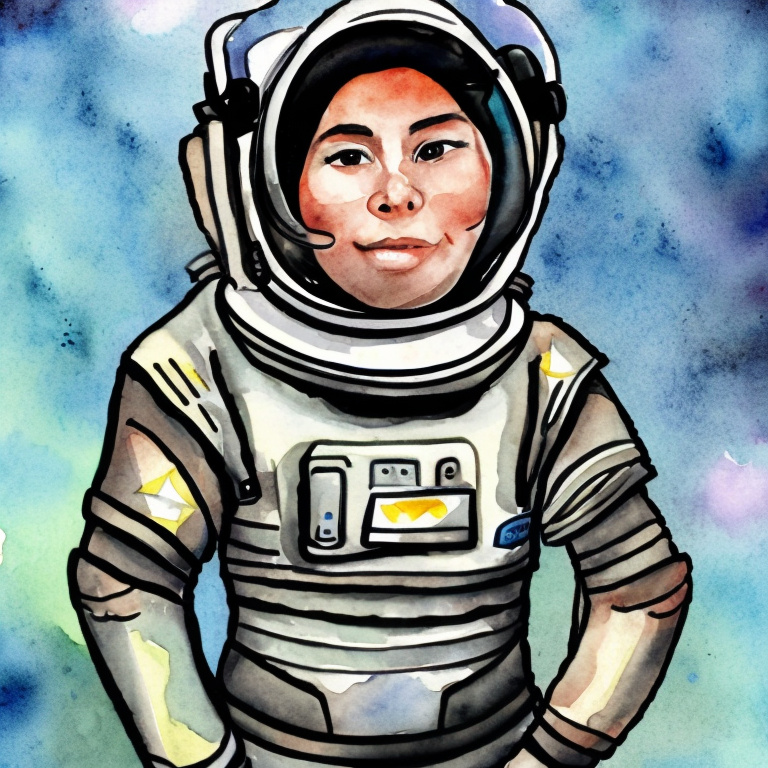

In [10]:
prompt = 'A portrait of devaki in a watercolor style, wearing a spacesuit.'
image = generate_image(prompt)

# Show the generated image
display(image)

In [11]:
prompt_2 = 'A portrait of devaki in a watercolor style, riding a horse.'
prompt_3 = 'A portrait of devaki in a watercolor style, playing cricket.'


  0%|          | 0/50 [00:00<?, ?it/s]

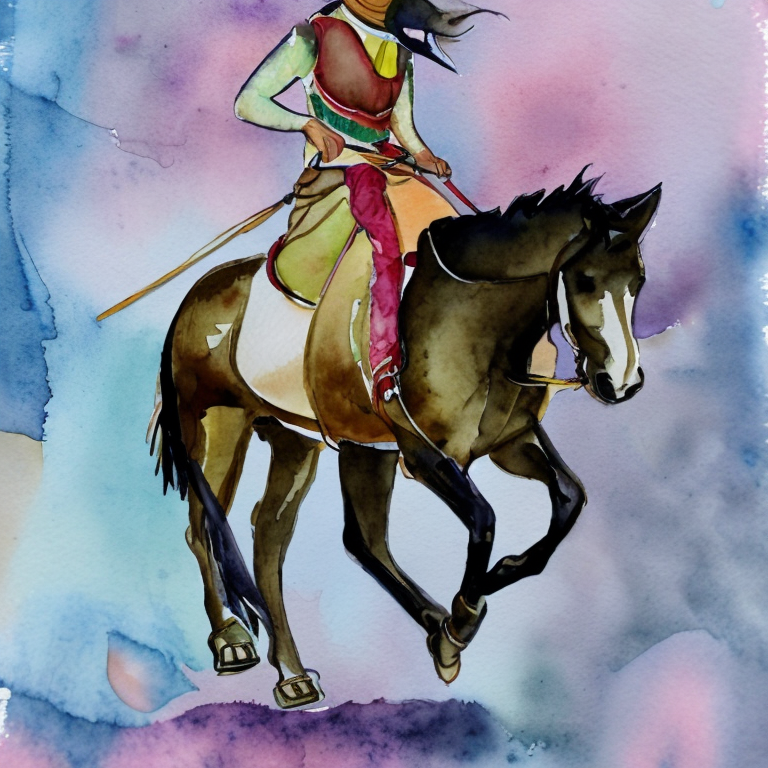

  0%|          | 0/50 [00:00<?, ?it/s]

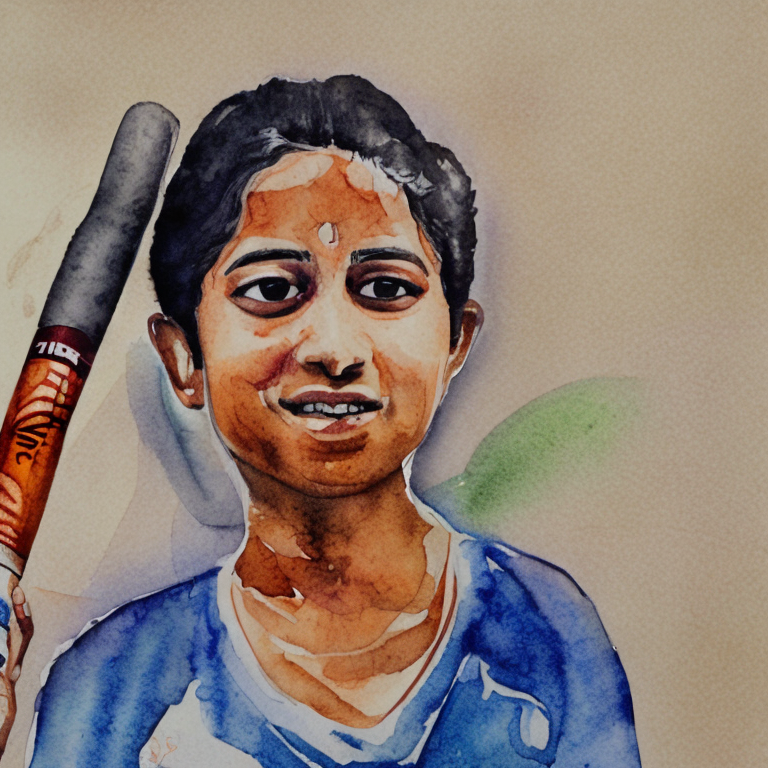

In [12]:
from IPython.display import display

image2 = generate_image(prompt_2)
display(image2)

image3 = generate_image(prompt_3)
display(image3)
